In [1]:
import sys, os
import timeit

import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns

# custom seaborn plot options to make the figures pretty
sns.set(color_codes=True, style='white', context='talk', font_scale=2)
PALETTE = sns.color_palette("Set1")
sns.set_palette(PALETTE[3:])

sys.path.append(os.path.realpath('..'))

# Independence Algorithm Speed

Here, we are evaluating the speed of the independence algorithms in `hyppo` when calculating the p-value given linearly distributed data. The replication script to perform the computations in R are also included within this directory (click on the "see on Github" link to for more information).

The following imports from `hyppo` are for all the independence tests and the linear simulation

In [2]:
from hyppo.independence import *
from hyppo.sims import linear

These are some constants that are used in this section of the notebook. If running these notebook, please only manipulate these constants if you are not running more tests.

In [3]:
N = [
    50,
    100,
    200,
    500,
    1000,
    2000,
    5000,
    10000
]

tests = [
    Dcorr,
    MGC,
    HHG
]

The following cell calculates the time it takes to calculate the test statistic and p-values and takes the minimum of 3 replications. The second loop calculates data specifically for the fast version of `Dcorr`.

**Note: We only recommend running this code ONCE to generate the csv files used to visualize the plots. This code takes a very long time to run and if running, we recommend using a machine with many cores.**

In [ ]:
for test in tests:
    times = []
    for n in N:
        x, y = linear(n, 1, noise=True)
        time = %timeit -n 1 -r 3 -q -o test().test(x, y, workers=-1) # use timeit, time.time() is inaccurate
        times.append(np.min(time.timings))
    np.savetxt('../independence/perf/{}.csv'.format(test.__name__), times, delimiter=',')
    
for test in [Dcorr]:
    times = []
    for n in N:
        x, y = linear(n, 1, noise=True)
        time = %timeit -n 1 -r 3 -q -o test().test(x, y, workers=-1, auto=True) # use timeit, time.time() is inaccurate
        times.append(np.min(time.timings))
    np.savetxt('../independence/perf/Fast_{}.csv'.format(test.__name__), times, delimiter=',')

Here, we plot the wall times computed from the CSVs in the `vs_sampsize` directory over each of the 20 simulations and for each test run. Using the saved CSVs ensures that the wall times code do not have to be run every time the script is run.

In [4]:
FONTSIZE = 30

def plot_wall_times():
    fig = plt.figure(figsize=(12,7))
    ax = plt.subplot(111)
    
    custom_color = {
        "Dcorr" : "#377eb8",
        "MGC" : "#e41a1c",
        "Fast_Dcorr" : "#377eb8",
        "HHG" : "#4daf4a"
    }
    
    # tests that will be added as line labels
    test_name = [
        "HHG",
        "MGC",
        "HHG_hhg",
        "Dcorr",
        "Dcorr_energy",
        "Dcorr_kernlab",
        "Fast_Dcorr",
    ]
    
    # titles corresponding to each label
    line_titles = [
        "HHG (hyppo)",
        "MGC (hyppo)",
        "HHG (HHG)",
        "Dcorr (hyppo)",
        "Dcorr (energy)",
        "MMD (kernlab)",
        "Fast Dcorr (hyppo)",
    ]
    
    # plot all curves
    i = 0
    for name in test_name:
        test_times = np.genfromtxt('../independence/perf/{}.csv'.format(name), delimiter=',')
        if name in ["Dcorr", "MGC", "HHG"]:
            ax.plot(N, test_times, custom_color[name], label=line_titles[i], lw=5)
        elif name in ["Fast_Dcorr"]:
            ax.plot(N, test_times, color=custom_color[name], label=line_titles[i], lw=5, linestyle='dashed')
        else:
            ax.plot(N, test_times, label=line_titles[i], lw=5, linestyle="dotted")
        i += 1
    
    # make plot pretty
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('Number of Samples')
    ax.set_ylabel('Execution Time\n(Seconds)')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xticks([1e2, 1e3, 1e4])
    ax.set_yticks([1e-4, 1e-2, 1e0, 1e2, 1e4])
    leg = plt.legend(bbox_to_anchor=(0.5, -0.05), bbox_transform=plt.gcf().transFigure,
                     ncol=2, loc='upper center')
    leg.get_frame().set_linewidth(0.0)
    for legobj in leg.legendHandles:
        legobj.set_linewidth(5.0)

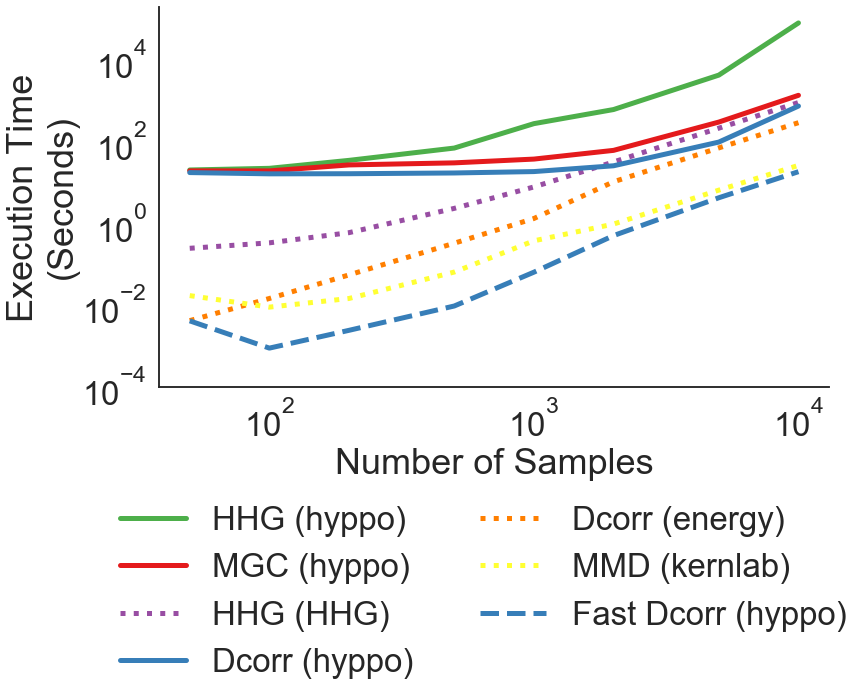

In [5]:
plot_wall_times()